### 3.15 Homework

#### Dataset

In this homework, we will continue the New York City Airbnb Open Data. You can take it from Kaggle or download from here if you don't want to sign up to Kaggle.

We'll keep working with the 'price' variable, and we'll transform it to a classification task.

#### Features

For the rest of the homework, you'll need to use the features from the previous homework with additional two 'neighbourhood_group' and 'room_type'. So the whole feature set will be set as follows:

'neighbourhood_group',

'room_type',

'latitude',

'longitude',

'price',

'minimum_nights',

'number_of_reviews',

'reviews_per_month',

'calculated_host_listings_count',

'availability_365'

Select only them and fill in the missing values with 0.

In [312]:
#import necessary libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [313]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [314]:
#download dataset from kaggle using API key
import opendatasets as od
url = "https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv"
od.download(url)

Skipping, found downloaded files in ".\new-york-city-airbnb-open-data" (use force=True to force download)


In [315]:
df_org = pd.read_csv("new-york-city-airbnb-open-data/AB_NYC_2019.csv")#read dataset into a dataframe

In [316]:
df_org.head() #examine first few rows of dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [317]:
features = ['neighbourhood_group','room_type','latitude','longitude','price','minimum_nights','number_of_reviews',
            'reviews_per_month','calculated_host_listings_count','availability_365'] #shortlisted features

In [318]:
df = df_org.copy()
df = df[features]

In [319]:
len(df.columns)

10

In [320]:
df.fillna(0,axis='columns',inplace=True)

In [321]:
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [322]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [323]:
df.neighbourhood_group.mode()

0    Manhattan
dtype: object

**Ans . Manhattan is the most frequent observation in 'neighbourhood_group'**

### Split the data

Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value ('price') is not in your dataframe.

In [324]:
df_full_train,df_test =  train_test_split(df,test_size=0.20,random_state=42)

In [325]:
df_train,df_val =  train_test_split(df_full_train,test_size=0.25,random_state=42)

In [326]:
#assigning X and y from dataframe
X_train = df_train.drop('price',axis=1)
y_train = df_train['price']

In [327]:
#assigning X and y from dataframe
X_val = df_val.drop('price',axis=1)
y_val = df_val['price']

In [328]:
#assigning X and y from dataframe
X_test = df_test.drop('price',axis=1)
y_test = df_test['price']

In [329]:
#look at shape post splitting of full train
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((29337, 9), (29337,), (9779, 9), (9779,), (9779, 9), (9779,))

### Question 2
Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?

In [330]:
numerical_columns = df_train.select_dtypes(exclude='object').columns

In [331]:
numerical_columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [332]:
cor_matrix = df_train[numerical_columns].corr() #correlation matrix of numerical columns

In [333]:
cor_matrix

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.035428,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.146318,-0.060660,0.055084,0.134642,-0.117041,0.083666
price,0.035428,-0.146318,1.000000,0.046668,-0.048225,-0.052908,0.053746,0.080121
minimum_nights,0.027441,-0.060660,0.046668,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.048225,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.052908,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.053746,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.080121,0.138901,0.174477,0.165376,0.225913,1.000000


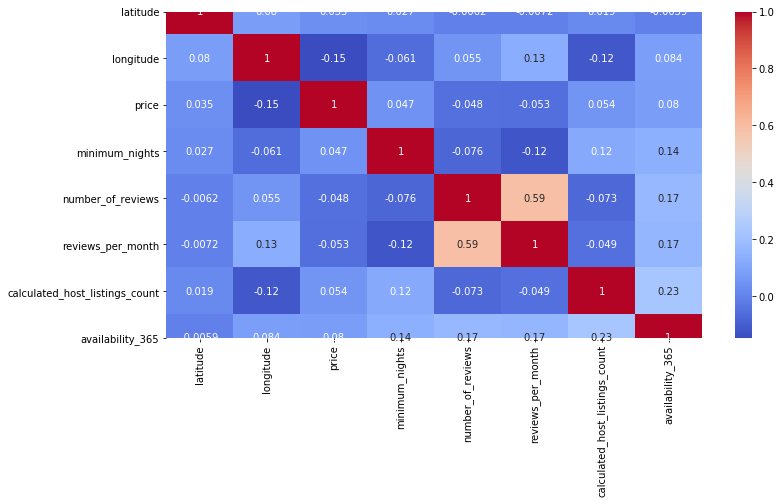

In [334]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train[numerical_columns].corr(),annot=True,cmap='coolwarm')
plt.show()

In [335]:
df_train[numerical_columns].corr().unstack().sort_values(ascending=False).drop_duplicates() #examin top correlation

latitude                        latitude                          1.000000
number_of_reviews               reviews_per_month                 0.590374
calculated_host_listings_count  availability_365                  0.225913
availability_365                number_of_reviews                 0.174477
reviews_per_month               availability_365                  0.165376
availability_365                minimum_nights                    0.138901
longitude                       reviews_per_month                 0.134642
minimum_nights                  calculated_host_listings_count    0.118647
longitude                       availability_365                  0.083666
latitude                        longitude                         0.080301
price                           availability_365                  0.080121
number_of_reviews               longitude                         0.055084
price                           calculated_host_listings_count    0.053746
minimum_nights           

## Make price binary

We need to turn the price variable from numeric into binary.
Let's create a variable above_average which is 1 if the price is above (or equal to) 152.

In [336]:
#write a function to convert continuos to category (binary 1 and 0)
def price_to_cat(col_value):
    if col_value >= 152:
        return 1
    else:
        return 0

In [337]:
#lets look at y values 
y_train[:5],y_val[:5],y_test[:5]

(13575     99
 48476     57
 44499     70
 17382    130
 14638    110
 Name: price, dtype: int64, 27408     65
 7741      89
 4771     200
 1719     120
 19153    748
 Name: price, dtype: int64, 879       89
 44383     30
 15394    120
 43230    470
 16332    199
 Name: price, dtype: int64)

In [338]:
y_train = y_train.map(price_to_cat) #convert y_train to binary cat

In [339]:
y_val = y_val.map(price_to_cat)

In [340]:
y_test = y_test.map(price_to_cat)

In [341]:
#look at post conversion
y_train[:5],y_val[:5],y_test[:5]

(13575    0
 48476    0
 44499    0
 17382    0
 14638    0
 Name: price, dtype: int64, 27408    0
 7741     0
 4771     1
 1719     0
 19153    1
 Name: price, dtype: int64, 879      0
 44383    0
 15394    0
 43230    1
 16332    1
 Name: price, dtype: int64)

#### Question 3

Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.

Which of these two variables has bigger score?

Round it to 2 decimal digits using round(score, 2)

In [342]:
cat_columns = list(df_train.select_dtypes(include='object').columns)

In [343]:
cat_columns


['neighbourhood_group', 'room_type']

In [344]:
df_train.price = df_train.price.apply(price_to_cat)

In [345]:
for col in cat_columns:
    print('The Mutual Information score between {} and price column is {}'.format(col,round(mutual_info_score(df_train[col],df_train['price']),2)))  

The Mutual Information score between neighbourhood_group and price column is 0.05
The Mutual Information score between room_type and price column is 0.14


### Question 4

Now let's train a logistic regression

Remember that we have two categorical variables in the data. Include them using one-hot encoding.

Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [346]:
# we will use DictVectorizer() for onehot encoding of cat columns
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [347]:
train_dicts = X_train.to_dict(orient='records') #convert train data to dict

In [348]:
X_train_encoded = dv.fit_transform(train_dicts) #fit and transform Dictvectorizer on train data

In [349]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [350]:
#using ohe on val dataset
val_dicts =  X_val.to_dict(orient='records')

In [351]:
X_val_encoded = dv.transform(val_dicts)

In [352]:
#building a logistic regression model
#defining a sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [353]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

In [354]:
model.fit(X_train_encoded,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [355]:
predictions = model.predict(X_val_encoded)

In [356]:
from sklearn import metrics
print('Accuracy of Logistic Regression on Validation set is {}'.format(round(metrics.accuracy_score(y_val,predictions),2)))

Accuracy of Logistic Regression on Validation set is 0.79


### Question 5

We have 9 features: 7 numerical features and 2 categorical.

Let's find the least useful one using the feature elimination technique.

Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

neighbourhood_group

room_type

number_of_reviews

reviews_per_month

note: the difference doesn't have to be positive

In [357]:
features = list(X_train.columns)
features

['neighbourhood_group',
 'room_type',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [358]:
len(features)

9

In [359]:
feature_loop = features.copy()


In [360]:
for i in range(1,10):
    feature_loop = features.copy()
    dropping_col = feature_loop[i-1]
    print('Dropping the column ',dropping_col)
    del feature_loop[i-1]
    train_loop_dicts = X_train[feature_loop].to_dict(orient='records') #convert train data to dict
    dv = DictVectorizer(sparse=False)
    X_train_loop = dv.fit_transform(train_loop_dicts)
    val_loop_dicts = X_val[feature_loop].to_dict(orient='records') #convert val data to dict
    X_val_loop = dv.transform(val_loop_dicts)
    
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train_loop,y_train)
    loop_predictions = model.predict(X_val_loop)
    
    print('Accuracy of Logistic Regression on Validation set while dropping column {} is {}'.format(dropping_col,round(metrics.accuracy_score(y_val,loop_predictions),2)))
    

Dropping the column  neighbourhood_group
Accuracy of Logistic Regression on Validation set while dropping column neighbourhood_group is 0.75
Dropping the column  room_type
Accuracy of Logistic Regression on Validation set while dropping column room_type is 0.72
Dropping the column  latitude
Accuracy of Logistic Regression on Validation set while dropping column latitude is 0.79
Dropping the column  longitude
Accuracy of Logistic Regression on Validation set while dropping column longitude is 0.79
Dropping the column  minimum_nights
Accuracy of Logistic Regression on Validation set while dropping column minimum_nights is 0.79
Dropping the column  number_of_reviews
Accuracy of Logistic Regression on Validation set while dropping column number_of_reviews is 0.79
Dropping the column  reviews_per_month
Accuracy of Logistic Regression on Validation set while dropping column reviews_per_month is 0.79
Dropping the column  calculated_host_listings_count
Accuracy of Logistic Regression on Valida

### Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn

We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.

Fit the Ridge regression model on the training data.

This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]

Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

In [361]:
df1 = df.copy()
df1_full_train,df1_test =  train_test_split(df1,test_size=0.20,random_state=42)#split into train/test
df1_train,df1_val =  train_test_split(df1_full_train,test_size=0.25,random_state=42)

In [362]:
#assigning X and y from dataframe
X_train_1 = df1_train.drop('price',axis=1)
y_train_1 = df1_train['price']

In [363]:
#assigning X and y from dataframe
X_val_1 = df1_val.drop('price',axis=1)
y_val_1 = df1_val['price']

In [364]:
#use log transfirmation on target variable
y_train_1 = np.log1p(y_train_1)
y_val_1 = np.log1p(y_val_1)

In [365]:
#use one hot encoding on train and val data
train_1_dicts = X_train_1.to_dict(orient='records') #convert train data to dict
dv = DictVectorizer(sparse=False)
X_train_1 = dv.fit_transform(train_1_dicts)
val_1_dicts = X_val_1.to_dict(orient='records') #convert val data to dict
X_val_1 = dv.transform(val_1_dicts)

In [372]:
from sklearn.linear_model import Ridge
r_list =[0, 0.01, 0.1, 1, 10]

for r in r_list:
    rdg = Ridge(alpha = r)
    rdg.fit(X_train_1,y_train_1)
    preds = rdg.predict(X_val_1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_val,preds))
    
    print(f'RMSE for Ridge Regression at r={r} is {round(RMSE,3)}')

RMSE for Ridge Regression at r=0 is 4.456
RMSE for Ridge Regression at r=0.01 is 4.456
RMSE for Ridge Regression at r=0.1 is 4.456
RMSE for Ridge Regression at r=1 is 4.456
RMSE for Ridge Regression at r=10 is 4.455
